# Plot data from previously saved models 

In [1]:
using Serialization
using CSV
using DataFrames
using Plots
using LaTeXStrings

plot = Plots.plot

include("utils.jl") 


In [ ]:
function compute_metrics(res, horiz, N)
    blr = res.L./(res.L.+res.Z)

    av_blr = sum(blr)/(N*horiz) 
    av_ser = sum(res.Ser)/(N*horiz)
    av_dr = sum(res.dr)/(N*horiz)

    total_clients = sum(res.Z[:,horiz+1])/N
    cost = res.c.ser*av_ser+ res.c.blr*av_blr

    return cost, av_blr, av_dr, av_ser, total_clients, blr
end

plot_paired_results (generic function with 3 methods)

1
400
Cost os: 53.693722955583254 | Cost om: 48.684257617559524
Av ser: 13.72 | Av ser om: 12.68
Av blr: 0.09993430738895814 | Av blr om: 0.09001064404389882
d_os


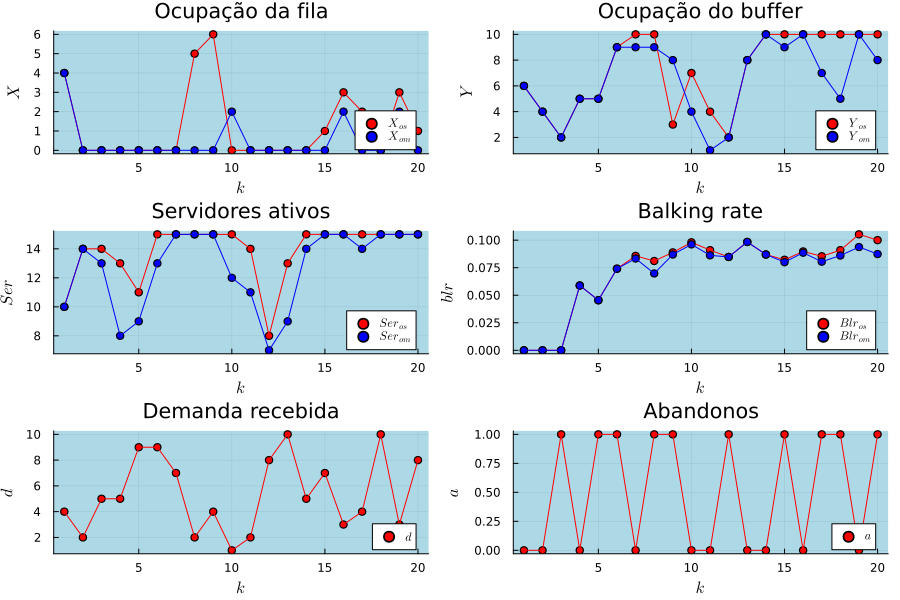

In [19]:
# id_list = readdir("results/")
id_list = ["d_os_20_10_1_6_10_9_15_3.txt"]
# id_list = ["d_os_20_14_1_4_8.txt"]

df = CSV.read("results.csv", DataFrame)
d_mat2, a_mat2 = nothing, nothing
d_mat, a_mat = nothing, nothing

for filename in id_list
    model_dict = deserialize("results//"*filename)
    a_mat = model_dict["a"]
    d_mat = model_dict["d"]
    res = model_dict["res"]


    model_dict2 = deserialize("results//"* "d_om_20_10_1_6_10_9_15_3.txt")
    a_mat2 = model_dict2["a"]
    d_mat2 = model_dict2["d"]
    res2 = model_dict2["res"]


    result_id = splitext(filename)[1]
    metrics = filter(:result_id => ==(result_id), df)

    cost, av_blr, av_dr, av_ser, total_clients, blr = compute_metrics(res, metrics[!, "horiz"][1], 10)
    cost2, av_blr2, av_dr2, av_ser2, total_clients2, blr2 = compute_metrics(res2, metrics[!, "horiz"][1], 10)

    println(res.c.ser)
    println(res.c.blr)
    println("Cost os: ", cost, " | Cost om: ", cost2)
    println("Av ser: ", av_ser, " | Av ser om: ", av_ser2)
    println("Av blr: ", av_blr, " | Av blr om: ", av_blr2)
    
    label = [L"X_{os}", L"Y_{os}", L"Ser_{os}", L"Blr_{os}", L"d", L"a",
           L"X_{om}", L"Y_{om}", L"Ser_{om}", L"Blr_{om}"]

    ylabel = [L"X" L"Y" L"Ser" L"blr" L"d" L"a"]
    title = ["Ocupação da fila" "Ocupação do buffer" "Servidores ativos" "Balking rate" "Demanda recebida" "Abandonos"]
    
    plot_paired_results(label, ylabel, title, res, metrics, 2, blr, d_mat, a_mat, res2, blr2, d_mat2, a_mat2)
end

Cost: 53.693722955583254
Av ser: 13.72
Av blr: 0.09993430738895814
d_os


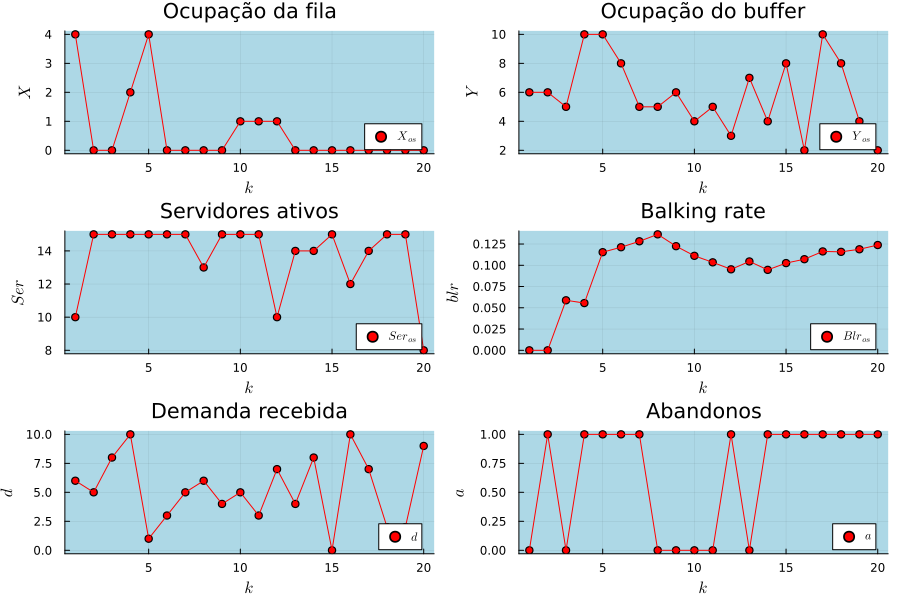

In [20]:
id_list = readdir("results/")
id_list = ["d_os_20_10_1_6_10_9_15_3.txt"]
# id_list = ["d_os_20_14_1_4_8.txt"]

df = CSV.read("results.csv", DataFrame)
d_mat2, a_mat2 = nothing, nothing
d_mat, a_mat = nothing, nothing

for filename in id_list
    model_dict = deserialize("results//"*filename)
    a_mat = model_dict["a"]
    d_mat = model_dict["d"]
    res = model_dict["res"]


    result_id = splitext(filename)[1]
    metrics = filter(:result_id => ==(result_id), df)

    cost, av_blr, av_dr, av_ser, total_clients, blr = compute_metrics(res, metrics[!, "horiz"][1], 10)


    println("Cost: ", cost)
    println("Av ser: ", av_ser)
    println("Av blr: ", av_blr)
    
    label = [L"X_{os}", L"Y_{os}", L"Ser_{os}", L"Blr_{os}", L"d", L"a"]

    ylabel = [L"X" L"Y" L"Ser" L"blr" L"d" L"a"]
    title = ["Ocupação da fila" "Ocupação do buffer" "Servidores ativos" "Balking rate" "Demanda recebida" "Abandonos"]
    
    plot_results(label, ylabel, title, res, metrics, 7, blr, d_mat, a_mat)
end